
# Grad Project: Using Python Analytics to Predict Heart Disease


    Name: Joshua Cook
    WIU ID: 915600254
    Class: DS 490
    Date: 03 May 2020
    
    Purpose: To apply the knowledge learned in class by utilizing Python and its libraries to
             run simple business analytics, including introductory machine learning aspects.
    
    Dataset: https://www.kaggle.com/johnsmith88/heart-disease-dataset
            Note: Data is also available in an unprocessed/raw form from the UCI Machine Learning Repository
                  https://archive.ics.uci.edu/ml/datasets/Heart+Disease


## Problem Statement

    Using a Heart Disease dataset from Kaggle (https://www.kaggle.com/johnsmith88/heart-disease-dataset),
    develop a model that will predict with 70% accuracy whether someone is likely to have heart disease based off
    of several criteria.
    


In [195]:
# Importing required libraries and dataset - heart.csv

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt # For basic visualizations
from mpl_toolkits.mplot3d import Axes3D # For the cluster 3D scatter plot
from scipy.stats import zscore
from sklearn import tree
from sklearn import cluster
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf # for predictive model 1 - continuous dependent varible 
import statsmodels.api as sm




In [196]:
# Importing the data
df = pd.read_csv("heart.csv",header=0)


df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Brief Explanation of Selectect Features

In [197]:
# Sex (Female = 0, Male = 1)

#trestbps = Resting Blood Pressure

# fbs = Abnormal Fasting Blood Sugar (Yes, is abnormal = 1, 0 = is normal)

#CP (Chest pain) type information is

    # Value 1: typical angina
    # Value 2: atypical angina
    # Value 3: non-anginal pain
    # Value 4: asymptomatic
    
# Target = Has Heart Disease (HD)? (0 = Does not have HD, 1 = Has HD)

## Exploratory Data Analysis (EDA)

In [198]:
df.shape

(1025, 14)

In [199]:
df.info() #Checking for missing values/ NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [200]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [201]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Informative Visualization #1 

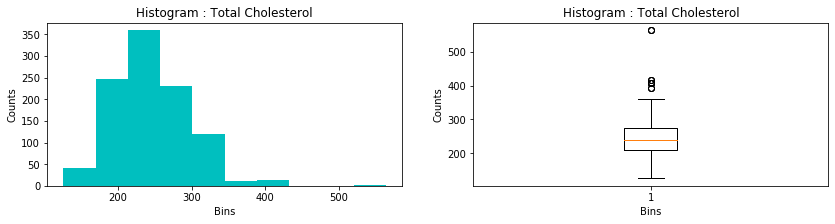

In [202]:
# Checking Outliers based off of std from above

fig , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.chol, bins=10, color='c')
ax1.set_title('Histogram : Total Cholesterol')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.boxplot(df.chol)
ax2.set_title('Histogram : Total Cholesterol')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()
# Both seem to suggest that 

In [203]:
#Investigating the outliers
df.loc[df.chol == df.chol.max()] #Appears to show duplicate values - Additionally, Chol >= 400 is abnormal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [204]:
df_duplicates = df.duplicated()
df_duplicates.value_counts()
df[df_duplicates]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [205]:
type(df) #Confirming my dataset is a Pandas DataFrame

pandas.core.frame.DataFrame

### Data Munging/Data Cleaning

In [206]:
# To make the feature titles more descriptive/easier to understand
df.columns = ["Age", "Male", "Chest_Pain_Type", "Resting_Blood_Pressure", "Total_Chol", "Fasting Blood Sugar",
              "Resting_ECG", "Max_BPM", "Exercised_Induced Angina", "Old_Peak", "Slope", "#Colored_Blood_Vessels",
              "Thalassemia", "Target"]
df.head()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Fasting Blood Sugar,Resting_ECG,Max_BPM,Exercised_Induced Angina,Old_Peak,Slope,#Colored_Blood_Vessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [207]:
# Dropping duplicates Identified in the EDA        
processed_df = df.drop_duplicates(keep="first")

In [208]:
# Removing outliers
processed_df["Total_Chol_zscore"] = zscore(processed_df.Total_Chol)
processed_df = processed_df[(processed_df.Total_Chol_zscore >= -3) & 
                      (processed_df.Total_Chol_zscore <= 3)]
processed_df.reset_index(drop=True, inplace=False)


/Users/cookme97/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Fasting Blood Sugar,Resting_ECG,Max_BPM,Exercised_Induced Angina,Old_Peak,Slope,#Colored_Blood_Vessels,Thalassemia,Target,Total_Chol_zscore
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,-0.667728
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,-0.841918
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,-1.403197
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,-0.841918
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.919336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,-0.687083
294,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,-2.041893
295,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,0.164513
296,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0.512893


In [209]:
# Dropping the Total_Chol_zscore column
processed_df = processed_df.drop(columns="Total_Chol_zscore")

In [210]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 878
Data columns (total 14 columns):
Age                         298 non-null int64
Male                        298 non-null int64
Chest_Pain_Type             298 non-null int64
Resting_Blood_Pressure      298 non-null int64
Total_Chol                  298 non-null int64
Fasting Blood Sugar         298 non-null int64
Resting_ECG                 298 non-null int64
Max_BPM                     298 non-null int64
Exercised_Induced Angina    298 non-null int64
Old_Peak                    298 non-null float64
Slope                       298 non-null int64
#Colored_Blood_Vessels      298 non-null int64
Thalassemia                 298 non-null int64
Target                      298 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.9 KB


In [211]:
processed_df.describe()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Fasting Blood Sugar,Resting_ECG,Max_BPM,Exercised_Induced Angina,Old_Peak,Slope,#Colored_Blood_Vessels,Thalassemia,Target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.308725,0.691275,0.963087,131.560403,243.778523,0.147651,0.533557,149.493289,0.328859,1.029195,1.399329,0.708054,2.308725,0.543624
std,9.043776,0.462744,1.032460,17.615364,45.761620,0.355350,0.525973,23.043692,0.470589,1.154899,0.618132,1.001011,0.612983,0.498931
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


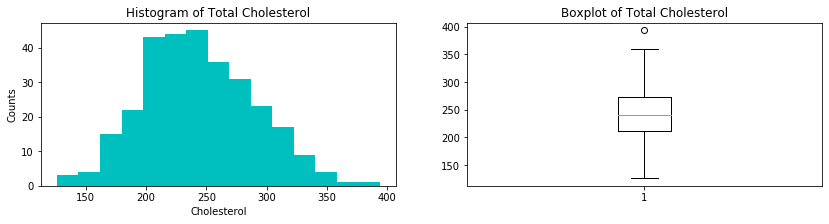

In [212]:
fig , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(processed_df.Total_Chol, bins=15, color='c')
ax1.set_title('Histogram of Total Cholesterol')
ax1.set_xlabel('Cholesterol')
ax1.set_ylabel('Counts')

ax2.boxplot(processed_df.Total_Chol)
ax2.set_title('Boxplot of Total Cholesterol')

plt.show()
# Data looks better. Slightly positively skewed

### Informative Visualization #2

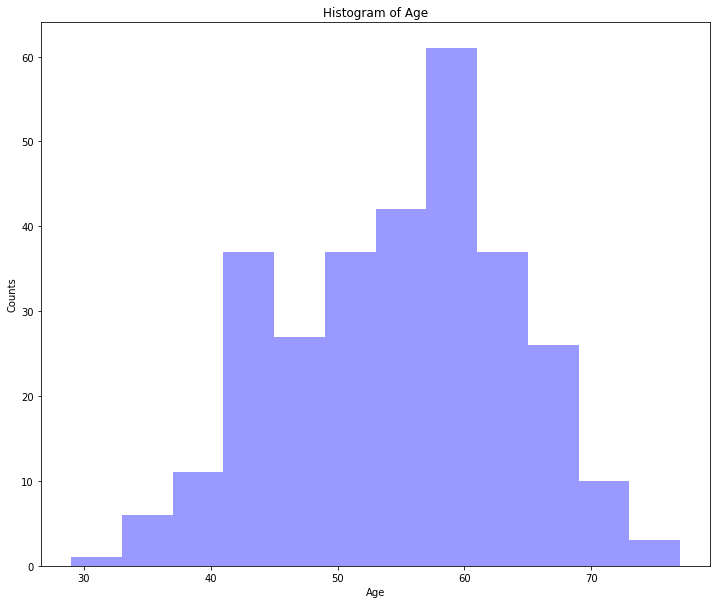

In [213]:
fig , ax1 = plt.subplots(1, 1 , figsize=(12,10))

sns.distplot(processed_df.Age,kde= False, color='b')


ax1.set_title('Histogram of Age')
ax1.set_ylabel('Counts')
plt.show()

## Identifying Correlations/Patterns

### Informative Visualization #3

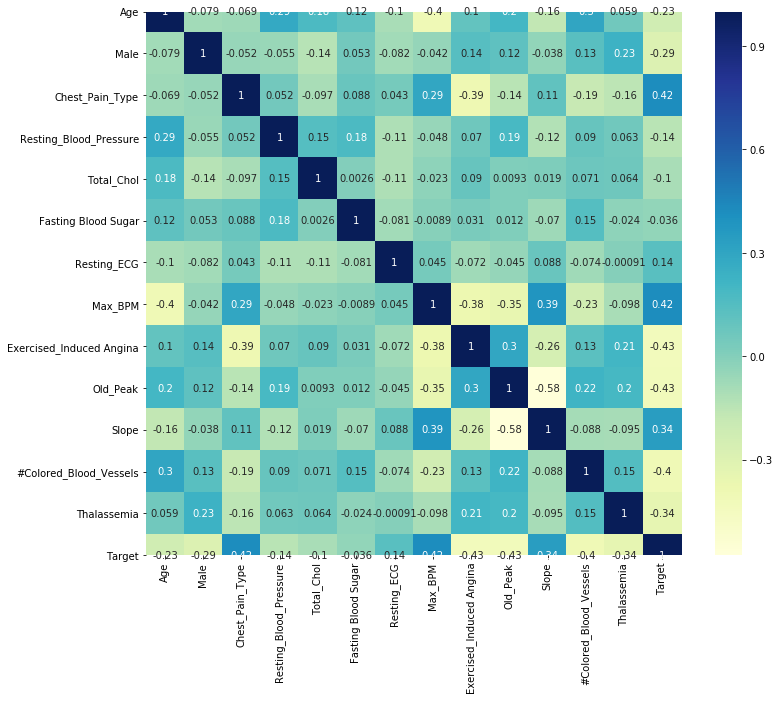

In [214]:
# Correlation using a visual Heat map
corr = processed_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu',square=False, xticklabels ='auto', yticklabels= 'auto');

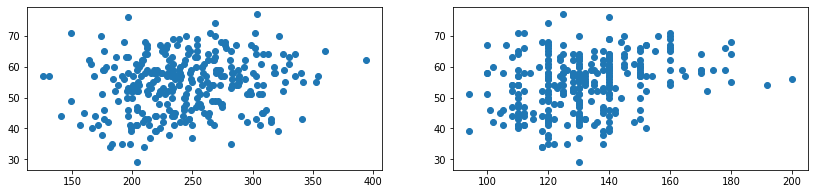

In [215]:
# Visualizing relationship between cholesterol levels and other features
fig , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.scatter(processed_df.Total_Chol,processed_df.Age)#Figure shows very little correlation - consistent with heatmap
ax2.scatter(processed_df.Resting_Blood_Pressure,processed_df.Age)

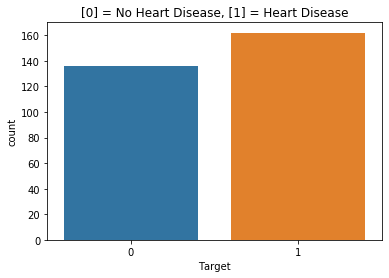

In [216]:
sns.countplot(processed_df.Target)
plt.title("[0] = No Heart Disease, [1] = Heart Disease");

Number of Individuals With No Heart Disease: 136 (45.64%)
Number of Individuals With Heart Disease: 162 (54.36%)
Number of Men With Heart Disease: 136 (45.64%)


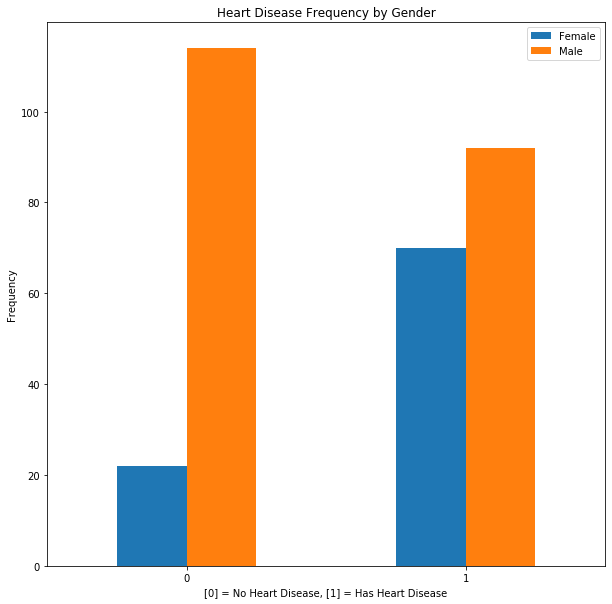

In [217]:
# Testing if men are more likely to be affected by heart disease
pd.crosstab(index=processed_df['Target'],columns=processed_df['Male']).plot(kind='bar',figsize=(10,10))

plt.title('Heart Disease Frequency by Gender')
plt.xlabel('[0] = No Heart Disease, [1] = Has Heart Disease')
plt.xticks(rotation=0)
plt.legend(["Female", "Male"])
plt.ylabel('Frequency')
#plt.show()

#Counting # of individuals with hearth disease
no_disease = len(processed_df[processed_df.Target == 0])
with_disease = len(processed_df[processed_df.Target == 1])

print("Number of Individuals With No Heart Disease:",no_disease,"({0:.2f}%)".format(((no_disease/len(processed_df.Target))*100)))
print("Number of Individuals With Heart Disease:",with_disease,"({0:.2f}%)".format(((with_disease/len(processed_df.Target))*100)))
print("Number of Men With Heart Disease:",no_disease,"({0:.2f}%)".format(((no_disease/len(processed_df.Target))*100)))

In [218]:
# Counting number of females (92) and number of males (206)
a = processed_df.groupby(by=["Male"])[['Target']].count()
a

,Target
Male,
0,92
1,206


In [219]:
# Number of females[0]/males[1] with heart diesase vs without 

b = processed_df.groupby(by=["Male",'Target'])[['Target']].count()
b

Target
Male Target        
0    0           22
     1           70
1    0          114
     1           92

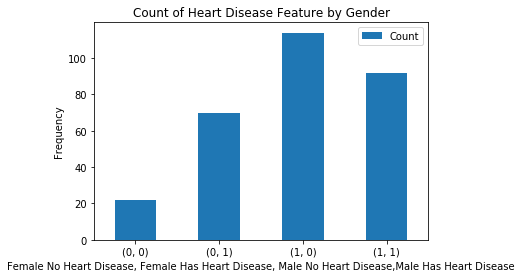

In [220]:
b.plot(kind='bar');
plt.title('Count of Heart Disease Feature by Gender')
plt.xlabel('Female No Heart Disease, Female Has Heart Disease, Male No Heart Disease,Male Has Heart Disease')
plt.xticks(rotation=0)
plt.legend(["Count"])
plt.ylabel('Frequency')
plt.show()

### Feature Engineering Examples

In [221]:
# Utilize categorical feature engineering to compare % male with heart disease to % of female with heart disease
# Can probably be done with a logical operator, but I cannot for the life of me figure it out - so this works just as fine


# Creating my new feature
processed_df['New_Feature'] = processed_df['Male'].map(str) + processed_df['Target'].map(str) #Creating my new feature 


# Setting intializers to zero and performing a for loop
qty_female_without = 0
qty_female_with = 0
qty_male_without = 0
qty_male_with =0
for i in processed_df.New_Feature:
    if i == '00': qty_female_without += 1
    elif i == '01': qty_female_with += 1
    elif i == '10': qty_male_without += 1
    else: qty_male_with += 1


total_qty_males = len(processed_df[processed_df.Male==1]['Male'])


total_qty_females = len(processed_df[processed_df.Male==0]['Male'])

tnof = "The number of"
   
print(tnof,'females without heart disease is:', qty_female_without,' or {0:.2f}%'.format((100*(qty_female_without/total_qty_females))))
print(tnof,'females with heart disease is:', qty_female_with,' or {0:.2f}%'.format((100*(qty_female_with/total_qty_females))))
print(tnof,'males without heart disease is:', qty_male_without,' or {0:.2f}%'.format((100*(qty_male_without/total_qty_males))))
print(tnof,'males with heart disease is:', qty_male_with,' or {0:.2f}%'.format((100*(qty_male_with/total_qty_males))))



The number of females without heart disease is: 22  or 23.91%
The number of females with heart disease is: 70  or 76.09%
The number of males without heart disease is: 114  or 55.34%
The number of males with heart disease is: 92  or 44.66%


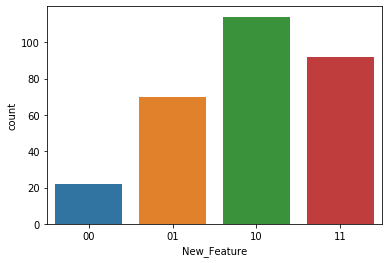

In [222]:
# Visualizing new feature
sns.countplot(processed_df.New_Feature)

In [223]:
processed_df.head()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Fasting Blood Sugar,Resting_ECG,Max_BPM,Exercised_Induced Angina,Old_Peak,Slope,#Colored_Blood_Vessels,Thalassemia,Target,New_Feature
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,10
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,10
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,10
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,10
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,00


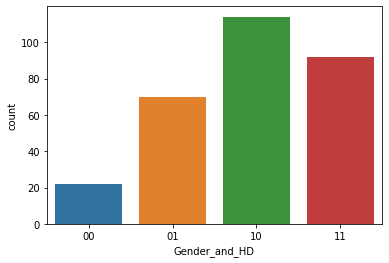

In [224]:
# An alternative way of doing the above:


processed_df['Gender_and_HD'] = processed_df['Male'].map(str) + processed_df['Target'].map(str) #Creating my new feature and apending the new column to the dataset


sns.countplot(processed_df['Gender_and_HD'])

In [225]:
processed_df.drop(labels='Gender_and_HD', axis='columns', inplace=True)

processed_df.head()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Fasting Blood Sugar,Resting_ECG,Max_BPM,Exercised_Induced Angina,Old_Peak,Slope,#Colored_Blood_Vessels,Thalassemia,Target,New_Feature
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,10
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,10
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,10
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,10
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,00


Interestingly, on a proporionate basis, there is a higher percentage of heart disease cases occurring in females for this given dataset. This contradicts research that males are more prone to develop heart disease.

### Feature Engineering Example #2

Thought Process - I know activity level is a strong factor in preventing heart disease. This data does not
                  provide too much information on how "heart healthy" an individual is. One way to estimate 
                  that is by comparing their max heart rate to a potential max heart with the following formula:
                  
                  Potential Max Heart Rate (PMHR) = 220 - Age


In [226]:
# Calculating the patients heart rate relative to their potential max heart rate (as a percentage)
processed_df["Percent_PMHR"] = round((processed_df['Max_BPM'].astype(int)/(220 - processed_df['Age'].astype(int))*100),2)
processed_df.tail()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Fasting Blood Sugar,Resting_ECG,Max_BPM,Exercised_Induced Angina,Old_Peak,Slope,#Colored_Blood_Vessels,Thalassemia,Target,New_Feature,Percent_PMHR
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,01,75.66
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,01,99.43
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,10,95.83
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,10,77.64
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,10,68.07


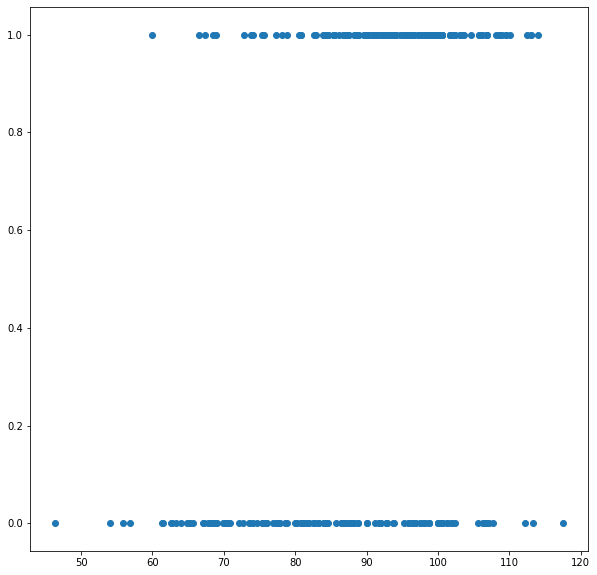

In [227]:
# Checking any correlation between heart disease and max heart. It is believed that those with heart disease
# will have a lower Percent_PMHR

fig , ax1 = plt.subplots(1, 1 , figsize=(10,10))

ax1.scatter(processed_df.Percent_PMHR,processed_df.Target)#Figure shows very little correlation - consistent with heatmap

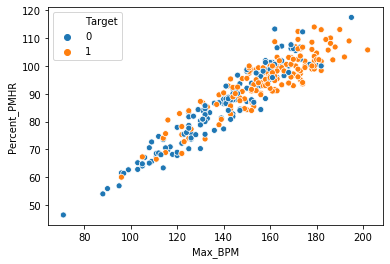

In [228]:
# Visualizing the correlation of heart rate between those with heart disease and those without

sns.scatterplot(processed_df.Max_BPM,processed_df.Percent_PMHR, hue=processed_df.Target)



# Utilizing Machine Learning 


In [232]:
# Cleaning up the dataset to only include features necessary to the machine learning
data = processed_df[["Age", "Male", "Chest_Pain_Type", "Resting_Blood_Pressure", "Total_Chol",
               "Max_BPM", "Thalassemia", "Target"]]


In [233]:
# Based off of the heatmap,it appeared the MaxBPM and ChestPainType are most directly related to whether or not
# someone has heart disease.

In [234]:
# We are aiming for accuracy, precisionn (confusion matrix), and recall
data.head()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Max_BPM,Thalassemia,Target
0,52,1,0,125,212,168,3,0
1,53,1,0,140,203,155,3,0
2,70,1,0,145,174,125,3,0
3,61,1,0,148,203,161,3,0
4,62,0,0,138,294,106,2,0


In [235]:
# Splitting the data into training and testing data

feature_col_names = ['Age', 'Male', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Total_Chol']
predicted_feature = ["Target"]

X = data[feature_col_names].values
y = data[predicted_feature].values 
split_test_size = .70

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_test_size,random_state=42) 


## Classification Machine Learning Examples 

### Testing Out a Naive Bayes/Gaussian Type Model for Categorical Target

In [236]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [239]:
# Testing Accuracy of the Gaussian model on the TRAINING Data
nb_predict_train = nb_model.predict(X_train)

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.8315


In [238]:
# Testing Accuracy of the Gaussian model on the TESTING Data

#NOTE:  Running this cell too much will overfit the model to the training data.

nb_predict_test = nb_model.predict(X_test)

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7273


In [240]:
# Using a confusion matrix and classification report to help determine accuracy
print('Confusion Matrix:\n')
print('{}\n'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('Classification Report:\n')
print(metrics.classification_report(y_test,nb_predict_test))

Confusion Matrix:

[[65 30]
 [27 87]]

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.68      0.70        95
           1       0.74      0.76      0.75       114

    accuracy                           0.73       209
   macro avg       0.73      0.72      0.72       209
weighted avg       0.73      0.73      0.73       209



### Testing a Logistical Regression Type Model for Categorical Target

In [241]:
# convert the dataframe in to array
y = np.array(data['Target'])
X = np.array(data[['Age', 'Male', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Total_Chol']])
 

logit_model = linear_model.LogisticRegression(C=.7,random_state=0)
logit_model.fit(X,y) #fitting the model

/Users/cookme97/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
# Predicting if a 55 year old Male with a Chest Pain Type of 0 (Typical Angina), and RestBP of 125, 
# and Total Cholesterol of 220 is likely to develop heart disease
prediction_1 = logit_model.predict([[55, 1, 0, 125, 220]])
prediction_1

array([0])

In [243]:
# The model is predicting that the personw will not have heart disease, but what is the probability?
prob_prediction_1 = logit_model.predict_proba([[55, 1, 0, 125, 220]])
prob_prediction_1

array([[0.75767363, 0.24232637]])

Based off of the explanatory variables, there is approximately a 75% probability that the individual will not have heart disease

### Logistic Regression Utilizing Stats Models

In [244]:
yy = (data['Target'])
XX = (data[['Age', 'Male', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Total_Chol']])
XX = sm.add_constant(XX, prepend=True)

/Users/cookme97/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [245]:
logit_model_sm = sm.Logit(yy,XX) #creating a model and passing the data
logit_fit_sm = logit_model_sm.fit() #fitting the model
logit_fit_sm.summary() #displaying the result

# # setting the predictive model 
# y = (data['pubrec'])
# X = (data[['male', 'atotinc', 'price', 'mortno']])
# X = sm.add_constant(X, prepend=True)

# X

# logit_model = sm.Logit(y,X) #creating a model and passing the data
# logit_fit = logit_model.fit() #fitting the model
# logit_fit.summary() #displaying the result

Optimization terminated successfully.
         Current function value: 0.501423
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                  298
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.2726
Time:                        23:08:34   Log-Likelihood:                -149.42
converged:                       True   LL-Null:                       -205.42
Covariance Type:            nonrobust   LLR p-value:                 1.551e-22
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7.5216      1.557      4.830      0.000       4.469      10.574
Age                       -0.0601      0.018     -3.397      0.001      -0.095      -0.025
Male                      -1.9246      0.352     -5.468      0.000      -2.615      -1.235
Chest_Pain_Type            1.0354      0.152      6.832      0.000       0.738       1.332
Resting_Blood_Pressure    -0.0201      0.009     -2.341      0.019      -0.037      -0.003
Total_Chol                -0.0039      0.003     -1.232      0.218      -0.010       0.002
==========================================================================================
"""

In [246]:
margeff = logit_fit_sm.get_margeff(at='mean') #predict method of fitted model logit_res
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                 Target
Method:                          dydx
At:                              mean
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                       -0.0147      0.004     -3.405      0.001      -0.023      -0.006
Male                      -0.4692      0.085     -5.538      0.000      -0.635      -0.303
Chest_Pain_Type            0.2524      0.036      6.924      0.000       0.181       0.324
Resting_Blood_Pressure    -0.0049      0.002     -2.346      0.019      -0.009      -0.001
Total_Chol                -0.0010      0.001     -1.232      0.218      -0.002       0.001
==========================================================================================
"""

**Interpretation** \
In this dataset and according to this particular model, being a male reduces the liklihood of having heart disease.

## Utilizing Tree Classification Model

In [247]:
y2 = (data['Target'])
X2 = (data[['Age', 'Male', 'Chest_Pain_Type', 'Resting_Blood_Pressure', 'Total_Chol']])

#calling the model and giving a name clf_model so as to use it again; 
#random state set the seed so that output is reproducible
clf_model = tree.DecisionTreeClassifier(random_state=0)
clf_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [248]:
clf_model.fit(X2, y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [249]:
clf_model.predict([[55, 1, 0, 125, 220]])

array([0])

In [250]:
clf_model.predict_proba([[55, 1, 0, 125, 220]])

array([[1., 0.]])

## Regression Type Machine Learning Examples (Supervised Learning)

### Using Linear Regression to Predict a Continuous Variable

In [251]:
# Using linear regression to predict Total Cholesterol based off of Age, Gender, Resting Blood Pressure, Max Heart Rate


linreg_model = smf.ols('Total_Chol ~ Age + Male + Chest_Pain_Type + Resting_Blood_Pressure + Max_BPM + Target', data).fit()
linreg_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Total_Chol   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.019
Date:                Sat, 02 May 2020   Prob (F-statistic):           0.000694
Time:                        23:08:46   Log-Likelihood:                -1549.9
No. Observations:                 298   AIC:                             3114.
Df Residuals:                     291   BIC:                             3140.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                160.0192     33.848      4.728      0.000      93.402     226.636
Age                        0.7681      0.328      2.340      0.020       0.122       1.414
Male                     -14.8990      5.940     -2.508      0.013     -26.590      -3.208
Chest_Pain_Type           -3.7807      2.823     -1.339      0.182      -9.337       1.775
Resting_Blood_Pressure     0.2287      0.156      1.470      0.143      -0.078       0.535
Max_BPM                    0.2083      0.134      1.555      0.121      -0.055       0.472
Target                    -9.6317      6.533     -1.474      0.142     -22.491       3.227
==============================================================================
Omnibus:                        0.964   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                1.034
Skew:                           0.133   Prob(JB):                        0.596
Kurtosis:                       2.887   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
linr_table = sm.stats.anova_lm(linreg_model, typ=1) 
linr_table

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,19356.987909,19356.987909,9.807304,0.001915
Male,1.0,9460.001279,9460.001279,4.792952,0.029371
Chest_Pain_Type,1.0,5318.107462,5318.107462,2.694443,0.101779
Resting_Blood_Pressure,1.0,6438.890700,6438.890700,3.262293,0.071923
Max_BPM,1.0,2735.857472,2735.857472,1.386134,0.240021
Target,1.0,4289.588016,4289.588016,2.173339,0.141502
Residual,291.0,574355.949712,1973.731786,NaN,NaN


The analysis seems to show that the independent variables in the linear regression model are **not** good predictors for an individual's total cholesterol. This makes sense because of the high degree of variability in determining cholesterol levels (e.g. genetics, diet, smoking/drinking habits, exercise, etc.).

In [253]:
# Can we predict someone's max heart rate (Max_BPM)? Intuitively, max heart rate decreases with age, and should decrease based on heart health

linreg_model_v2 = smf.ols('Max_BPM ~ Age + Chest_Pain_Type + Resting_Blood_Pressure + Total_Chol + Target', data).fit()
linreg_model_v2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Max_BPM   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     25.85
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.36e-21
Time:                        23:08:58   Log-Likelihood:                -1302.7
No. Observations:                 298   AIC:                             2617.
Df Residuals:                     292   BIC:                             2640.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                166.3157     11.099     14.984      0.000     144.471     188.160
Age                       -0.9172      0.133     -6.882      0.000      -1.180      -0.655
Chest_Pain_Type            3.2567      1.215      2.681      0.008       0.866       5.647
Resting_Blood_Pressure     0.1028      0.068      1.520      0.130      -0.030       0.236
Total_Chol                 0.0366      0.025      1.452      0.147      -0.013       0.086
Target                    13.6576      2.569      5.316      0.000       8.601      18.714
==============================================================================
Omnibus:                        6.666   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.823
Skew:                          -0.368   Prob(JB):                       0.0330
Kurtosis:                       2.913   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The **linreg_model_v2** does a better job at predicting a dependent variable than the first linear regression model, but fails to show a strong correlation.

In [254]:
data.head()

,Age,Male,Chest_Pain_Type,Resting_Blood_Pressure,Total_Chol,Max_BPM,Thalassemia,Target
0,52,1,0,125,212,168,3,0
1,53,1,0,140,203,155,3,0
2,70,1,0,145,174,125,3,0
3,61,1,0,148,203,161,3,0
4,62,0,0,138,294,106,2,0


## Clustering the Dataset (Unsupervised Learning)

In [263]:
# Passing numerical features for the clustering

cluster_data = data.loc[:,['Age','Resting_Blood_Pressure', 'Total_Chol']]

#data = processed_df[["Age", "Male", "Chest_Pain_Type", "Resting_Blood_Pressure", "Total_Chol", "Fasting Blood Sugar",
#              "Resting_ECG", "Max_BPM", "#Colored_Blood_Vessels","Thalassemia", "Target"]]


In [256]:
kmeans_model = cluster.KMeans(n_clusters=3, random_state=42) 

# Fitting the model to the data
kmeans_model.fit(cluster_data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [257]:
#Generating a PandasDataFrame of the cluster labels for the dataset 
cluster_labels = pd.DataFrame(kmeans_model.labels_.astype(int), columns = ['Cluster_Groups'])
cluster_labels.tail()

,Cluster_Groups
293,0
294,0
295,1
296,1
297,0


In [258]:
# Checking for null values
cluster_labels.isnull().sum()

Cluster_Groups    0
dtype: int64

In [259]:
cluster_labels.shape

(298, 1)

In [260]:
# Joining the data
scatter_data = cluster_data.join(cluster_labels,how='left')

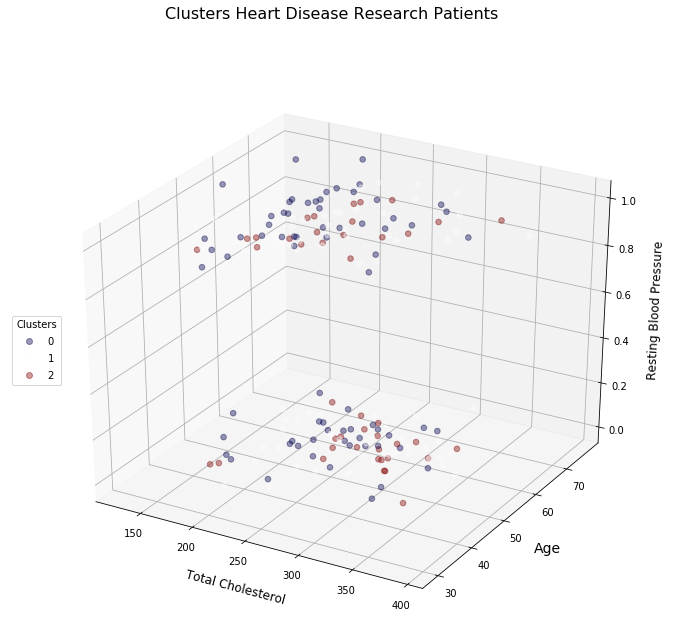

In [261]:
# Building the 3D Scatter Plot

fig, ax5 = plt.subplots(figsize=(12, 10), subplot_kw = {'projection': '3d'})

# giving title to the figure using the method suptitle for Figure object fig
fig.suptitle("Clusters Heart Disease Research Patients", fontsize=16) 

#extracting the columns and converting into arrays for no hassles in processing later
fx = scatter_data.Total_Chol
fy = scatter_data.Age
fz = scatter_data.Target
cluster_color_code = np.array(scatter_data.loc[:, "Cluster_Groups"])

scatter_plot = ax5.scatter(fx, fy, fz, c=cluster_color_code, cmap='seismic', s=10**1.5, alpha =0.4)

ax5.legend(*scatter_plot.legend_elements(), loc="center left", title="Clusters", frameon=True)

# Adding Labels
ax5.set_xlabel('Total Cholesterol', fontsize=12)
ax5.set_ylabel('Age', fontsize=14)
ax5.set_zlabel("Resting Blood Pressure", fontsize=12)
ax5.xaxis.labelpad = 12
ax5.yaxis.labelpad = 12
ax5.zaxis.labelpad = 12

plt.show()